Importamos las librerias; es muy importante que la carpeta de imagenes y los paquetes en este caso mnist esten en el mismo ambiente

In [12]:

from mnist import MNIST

mndata = MNIST('MNIST_data')

 DATOS de entrenamiento (features = images y labels = labels)
 (features = datos y labels = etiquetas)

In [13]:

datos, labels = mndata.load_training()

Las librerias de visualización


Trabajando en escala de grises

In [14]:

%matplotlib inline
from matplotlib import pyplot as plt

al trabajar con arrays instalo numpy

In [16]:
import numpy as np

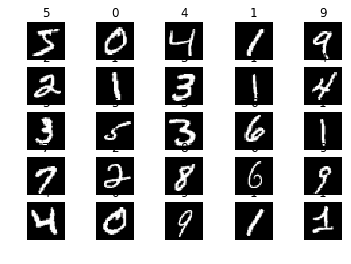

In [17]:
plt.gray()


for i in range(25):
    plt.subplot(5,5,i+1)
    
    d_image = datos[i]
    d_image = np.array(d_image, dtype='float')
    
    pixels = d_image.reshape((28, 28))
    
    plt.imshow(pixels, cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.show()

sk-learn para dividir todo el set de entrenamiento en: entrenamiento y validación
 https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
 


In [18]:
from sklearn.model_selection import train_test_split

 DATOS 
 todos los datos de training... deben ser divididos, el comando split permite dividir estos datos en diferentes porcentajes

  -Datos de Entremamiento 70%  (features, labels)
  -Datos de Testing  30%   (features y labels)

 sklearn.model_selection.train_test_split(*arrays, **options)

test zize agarra el 30% y me toma datos random

In [19]:
train_data, test_data, train_labels, test_labels = train_test_split(datos, labels, test_size=0.3, random_state=42)

# Modelos y Entrenamiento
Los datos estan listo para ser entrenados en nuestro clasificador.

Vamos a seleccionar entre las diferentes opciones de Machine Learning supervisado:

* Arbol de decisiones "Decision Tree"
* Random Forest

Se importa la libreria necesaria

In [21]:

from sklearn.tree import DecisionTreeClassifier

Crea el clasificador

In [23]:


clf_dt = DecisionTreeClassifier()

Para entrenar usamos fit

In [24]:


clf_dt.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Evaluación 
Utilizando la SKLEARN Matriz de Confusión

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Importa librerias

In [26]:
from sklearn.metrics import confusion_matrix

definimos una funcion para evaluar el clasificador

In [27]:
def evaluate_classifier(clf, test_data, test_labels):
    pred = clf.predict(test_data)
    
    MC = confusion_matrix(test_labels, pred)
    return MC

vamos a evaluar nuestro clasificador con todo el "training" y "testing" set

evaluar clasificador: ARBOL DE DECISIONES, datos de evaluación: test_data, test_labels

In [28]:
MC = evaluate_classifier(clf_dt, test_data, test_labels)

Imprimi la matriz

In [29]:
print(MC)

[[1642    0   25   16   19   31   31    7   27    7]
 [   2 1912   22   11    3    9    8    8   11    8]
 [  15   25 1461   57   22   22   53   34   49   21]
 [  15   15   58 1497   15   93    8   30   75   40]
 [  11    7   19    7 1493   17   19   32   23   98]
 [  38   13   22   79   27 1321   46   11   58   38]
 [  29    3   30   12   28   34 1599    1   40   11]
 [   5   13   38   21   21   16    3 1766   22   32]
 [  21   33   53   53   46   60   38   25 1344   57]
 [  14   11   21   35   79   43   12   62   56 1430]]


Calcula los valores de la matriz de confusión, pero con los datos de la diagonal que son lo valores correctos y que mejor dieron

In [30]:
score = MC.diagonal().sum()*100./MC.sum()

Imprime los puntajes

In [31]:
print(score)

85.91666666666667


# OTROS MODELOS



importar RandomForest de sk-learn

In [34]:
from sklearn.ensemble import RandomForestClassifier

## RandomForest

n_estimators numero de árboles que queremos en la red
min_samples_split número mínimo de filas que utilizaremos
min_samples_leaf número mínimo de samples que tenemos al final del árbol

clf_rd = RandomForestClassifier(n_estimators=<numero de arboles>)
estimamos con 150 árboles las division son de a 2

In [35]:
clf_rd = RandomForestClassifier(n_estimators=150, min_samples_split=2)

Se entrena

 vamos a evaluar nuestro clasificador con todo el "training" y "testing" set
 evaluar RANDOM FOREST con el metodo de evaluador clasificador

In [37]:
clf_rd.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

 ahora se evalua la matriz confusión

In [46]:
MC = evaluate_classifier(clf_rd, test_data, test_labels)

In [47]:
print(MC)

[[1776    0    1    0    3    4    8    0   11    2]
 [   0 1963   12    6    5    0    2    3    1    2]
 [   7    5 1713    5    4    1    2   15    5    2]
 [   4    1   28 1738    1   26    2   21   16    9]
 [   2    2    1    0 1678    0    6    7    2   28]
 [   6    3    3   19    2 1587    9    2   15    7]
 [   3    1    1    0    5   10 1760    0    7    0]
 [   2   12   27    1    8    0    0 1869    3   15]
 [   1    8   14   13   13   12    5    2 1650   12]
 [   6    3    5   17   22    9    2   14    9 1676]]


Imprime los puntajes acordase que son los valores de las diagonales

In [48]:
score = MC.diagonal().sum()*100./MC.sum()

In [49]:
print(score)

96.72222222222223


 vamos a probar los datos de prueba
 Cargamos los datos de evaluacion

# Set de datos de prueba

 Aplicamos el clasificador a todo el dataset de Evaluacion 


In [51]:

eval_data, eval_labels = mndata.load_testing()

In [52]:

predicted_data = clf_rd.predict(test_data)

vamos a evaluar nuestro clasificador con todo el "training" y "testing" 
set evaluar RANDOM FOREST con el metodo de evaluador clasificador

In [53]:

MC_clf_rd = evaluate_classifier(clf_rd, eval_data, np.array(eval_labels))

In [54]:
# imprimir valor de la matriz de confusión
print(MC_clf_rd)

[[ 970    0    0    0    0    2    1    1    5    1]
 [   0 1123    3    3    0    2    2    1    1    0]
 [   6    0  997    7    1    0    4    9    8    0]
 [   0    0   11  971    0    6    0    9    9    4]
 [   1    0    2    0  950    0    5    1    3   20]
 [   4    2    0   14    3  855    6    2    4    2]
 [   5    3    1    0    3    6  938    0    2    0]
 [   2    4   20    0    0    0    0  990    2   10]
 [   4    0    6    8    7    5    5    5  922   12]
 [   5    6    1   12   12    3    1    4    6  959]]


In [55]:
# calcular el puntaje (score)
score_clf_rd = MC_clf_rd.diagonal().sum()*100./MC_clf_rd.sum()

In [56]:
# imprimir el puntaje (score)
print(score_clf_rd)

96.75


# Una prueba mas

mostrar un digito seleccionado

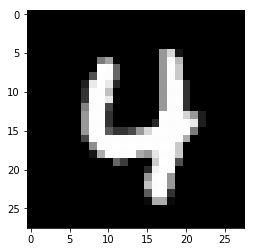

In [68]:
digitextra = test_data[9]
d = np.array(digitextra, dtype='float')
pixels = d.reshape((28,28))
plt.imshow(pixels, cmap ='gray')
plt.show()

Según nuestro clasificador( con el modelo elegido) en la posicion 8 q valor obtendremos??

In [70]:
print(clf_rd.predict([test_data[9]]))

[4]
